# Traitement des données textuelles

Souvent plusieurs étapes, notamment la récupération et la mise en  forme

## Moment 1 - Récupérer le corpus

Présence du terme "chloroquine" ou "hydroxychloroquine" dans les articles de presse

Moment "man in the loop" avec une interface comme Europresse

## Moment 2 - Traiter les données

In [2]:
import bs4 # Bibliothèque données html
import pandas as pd # Bibliothèque tableaux
import matplotlib.pyplot as plt # Bibliothèque visualisations

#Script fait à part de nettoyage
import europresse

Détailler un peu le module qui mobilise BeautifulSoup

- manipuler des formats HTML
- recherche des balises, des arborescences...
- facilite le parsing
- d'autres stratégies, avec par exemple les expressions régulières

In [6]:
!cat europresse.py

import pandas as pd
import bs4 as bs
import regex as re
import datetime
import os
import matplotlib.pyplot as plt

__version__ = "0.1.0"

def extract(file): 
    """
    Extraction de données d'une page Europesse (nombre limités de champs)
    """
    corpus_html = bs.BeautifulSoup(open(file, encoding="utf8"),"lxml")    
    corpus = [] #tableau que l'on va remplir avec les données
    for i in corpus_html.find_all("article"):
        
        #on regarde s'il y a un titre dans l'article
        try:
            titre = i.find("div",{"class":"titreArticle"}).text 
        except:
            titre = None #sinon on renvoie rien
            
        #Pareil pour la date/header
        try:
            header = i.find("span",{"class":"DocHeader"}).text
        except:
            header = None
        
        #Le nom de la publicatoin
        try:
            publication = i.find("span",{"class":"DocPublicationName"}).text
        except:
            publication = None
         
        

Chargement des données et création d'un CSV

In [7]:
# Extraire les données de la page
corpus = europresse.extract("./biblioeuropresse20220403091924.HTML")

# Passage dans un tableau
corpus = pd.DataFrame(corpus)

# Mise en forme
corpus.columns = ["Date","Titre","Journal","Contenu","Auteur"]
corpus["Date_reco"] = corpus["Date"].apply(europresse.reco_date)
corpus["Date_reco"] = pd.to_datetime(corpus["Date_reco"])
corpus = corpus.set_index("Date_reco")
corpus.to_csv("../Data/europresse_HC_suisse.csv")
corpus

,Date,Titre,Journal,Contenu,Auteur
Date_reco,,,,,
2021-07-02,"International, vendredi 2 juillet 2021 860 m...","La stratégie covid brésilienne, un acharnemen...",Le Temps,7056 @fabiengoubet Avec Donald Trump en...,FABIEN GOUBET
2020-03-26,"Science, jeudi 26 mars 2020 2170 mots, p. 9",Chloroquine: une recherche controversée,Le Temps,6675 @fabiengoubet Voilà un peu plus d'...,FABIEN GOUBET
2020-06-16,"Économie, mardi 16 juin 2020 1192 mots, p. 15",[Transport aérien...],"Tribune de Genève, no. 5326",Transport aérien Qatar Airways va réduire ...,None
2020-03-18,"Science, mercredi 18 mars 2020 1022 mots, p. 9",Une piste pour lutter contre le SARS-CoV-2,Le Temps,6668 (LE MONDE) La course aux traitemen...,SANDRINE CABUT
2020-03-20,"Point fort, vendredi 20 mars 2020 1558 mots,...",[Coronavirus...],"24 Heures (Suisse), no. 4306 Région, Lausanne",Coronavirus De la chloroquine contre le vi...,None
...,...,...,...,...,...
2000-05-17,"International, mercredi 17 mai 2000 1204 mots",Un groupe incontrôlé d'Abu Sayyaf joue un mau...,"Le Temps, no. 706",Un groupe d'une douzaine de civils armés de ...,"Arnaud Dubus, envoyé spécial sur l'île de Jolo"
2001-09-11,"Sciences & multimédia, mardi 11 septembre 20...",L'avenir des plantes médicinales Trois cents ...,"Le Temps, no. 1122","Fabriquer un nouveau médicament, aujourd'hui...",Anne Crisinel
2005-01-03,"Temps fort, lundi 3 janvier 2005 581 mots",L'impossible décompte des morts à Banda Aceh ...,"Le Temps, no. 2140","S'il n'y avait eu que l'eau, lance Ibrahim, ...","Alain Lallemand, envoyé spécial à Banda Aceh"


## Moment 3 - Produire une information

Text(0, 0.5, "Nombre d'articles")

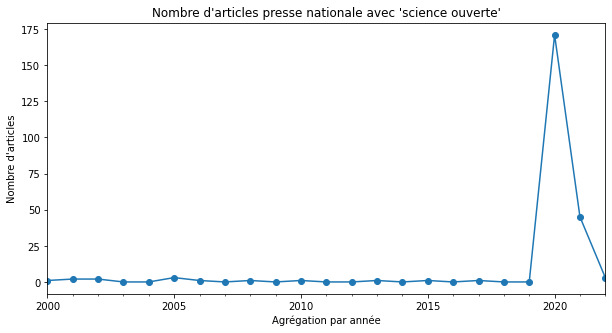

In [5]:
ax = corpus["Titre"].resample("y").count().plot(figsize=(10,5),style="o-")
ax.set_title("Nombre d'articles presse nationale avec 'science ouverte'")
ax.set_xlabel("Agrégation par année")
ax.set_ylabel("Nombre d'articles")

## Moment ... sky is the limit

- Recoder les journaux
- Nombre d'occurence du terme
- Analyse thématique ?